# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [320]:
! pwd

/Users/michaelmainzer/Documents/GA/DSI/mike1/01-projects/notebooks


In [321]:
import pandas as pd
import numpy as np

from datetime import datetime

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib notebook
#'/Users/michaelmainzer/Documents/GA/DSI/mike1/01-projects/assets/02-project2-assets/billboard.csv'
bData = pd.read_csv('../assets/02-project2-assets/billboard.csv')

In [322]:
bData['date.entered'] = pd.to_datetime(bData['date.entered'])
bData['date.peaked'] = pd.to_datetime(bData['date.peaked'])
bData['x1st.week'] = bData['x1st.week'].astype(float)

In [323]:
bData['days.to.peak'] = (bData['date.peaked'] - bData['date.entered']).dt.days

In [324]:
totalWeeks = []

for i in range(len(bData)):
    totalWeeks.append(0)
    for j in range(7,83):
        if bData.iloc[i,j] >= 1:
            totalWeeks[i] += 1

bData['total.weeks'] = totalWeeks

### Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [325]:
df = pd.melt(bData, id_vars = ['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked', 
                               'days.to.peak', 'total.weeks'], var_name='Week', value_name='Rank')

df.columns = ['Year','Artist','Track','Length','Genre','Date Entered Rankings','Date Peaked','Days to Peak',
              'Total Weeks','Week','Rank']
df1 = df.dropna()

df1.to_csv('../assets/02-project2-assets/billboard1.csv')

In [326]:
#Data dictionary goes here.
df1

,Year,Artist,Track,Length,Genre,Date Entered Rankings,Date Peaked,Days to Peak,Total Weeks,Week,Rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,56,28,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,56,26,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,98,33,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,35,24,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,70,21,x1st.week,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,70,24,x1st.week,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,84,32,x1st.week,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,84,20,x1st.week,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,49,26,x1st.week,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,273,55,x1st.week,81.0


In [327]:
genreRank = df1['Rank'].groupby([df1['Genre']]).mean()
genreRank.to_csv('../assets/02-project2-assets/genre_mean.csv')

In [328]:
genreWeeks = df1['Total Weeks'].groupby([df1['Genre']]).mean()
genreWeeks.to_csv('../assets/02-project2-assets/genre_weeks.csv')

In [329]:
genreDaystoPeak = df1['Days to Peak'].groupby([df1['Genre']]).mean()
genreDaystoPeak.to_csv('../assets/02-project2-assets/genre_daystopeak.csv')

In [330]:
topTenOverTime = df1.loc[df1['Rank'] <= 10]

topTenOverTime.to_csv('../assets/02-project2-assets/top_ten_over_time.csv')

In [331]:
topFiveOverTime = df1.loc[df1['Rank'] <= 5]

topFiveOverTime.to_csv('../assets/02-project2-assets/top_five_over_time.csv')

In [332]:
newdf = df1.loc[df1['Rank'] < 2]
del newdf['Week']
topHits = newdf.drop_duplicates()
topHits.to_csv('../assets/02-project2-assets/topHits.csv')

In [333]:
del topTenOverTime['Week']
del topTenOverTime['Rank']
topTen = topTenOverTime.drop_duplicates()

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

<IPython.core.display.Javascript object>


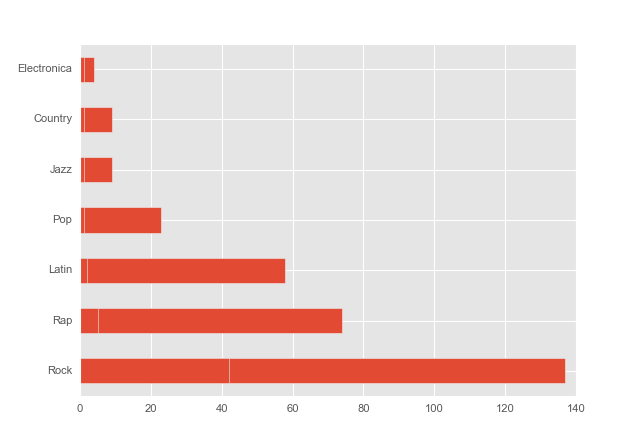

In [334]:
color_list = []
top_genres = bData.genre.value_counts()
top_genres.plot(kind='barh')



In [335]:
topTenGenres = topTen.Genre.value_counts()
topTenGenres.plot(kind='barh')
plt.show()

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 